 Manipular dfs para obtener un single df que se utilizará en los modelos de ML para predecir infecciones/uso de camas uci

In [3]:
print('está funcionando')

está funcionando


In [2]:
# import libraries
import pandas as pd
import os

In [ ]:
# Parameters

In [3]:
# Functions

# Function to give semanaEstadistica a value from 1-53, different to iso8610 format
def weeknum_starting_jan1(date):
    """ 
    Calcula la semana estadística según el calendario que usa el MinSal, que no usa el formato ISO8610, sino que nombran la semana 1 donde cae el 1ro de Enero
    La idea es usarlo sobre toda una columna del df que tenga la fecha para que calcule la semana de cada una de las filas según su fecha

    Parameters:
        date: debería usarse en la columna 'time' del df que se esté procesndo, que corresponde a la fecha

    Returns: 
        Número de la semana obtenido en date
    """
    start_of_year = pd.Timestamp(year=date.year, month=1, day=1)
    days_since_start = (date - start_of_year).days
    week_number = days_since_start // 7 + 1
    return week_number

# Function to process Max Temperatures dataframes
def process_Tmax_dataframe(df):
    """ 
    Procesa el dataframe de temperaturas máximas, se le entregarán dfs del año 2014-2022

    Parameters: 
        df: dataframe del año sin procesar, revisar que sea de las temperaturas máximas, no temperaturas medias o mínimas
    
    Returns:
        Dataframe procesado según estandarice para que la data calce con la data epidemiológica del minsal
    """ 
    # Transform column time to datetime
    df['time'] = pd.to_datetime(df['time'])
    
    # Filter rows for the current year
    df = df[df['time'].dt.year == df['time'].dt.year.iloc[0]]
    
    # Add SemanaEstadistica 
    df['SemanaEstadistica'] = df['time'].apply(weeknum_starting_jan1)
    
    # Add column "Anio" to fit with epidemiologic data df
    df['Anio'] = df['time'].dt.year
    
    # Get only date 
    df['time'] = df['time'].dt.date

    # Calculate weekly stats
    weekly_stats = df.groupby(['nombreEstacion', 'SemanaEstadistica']).agg(
        Tmax_mean=('TxPM', 'mean'),
        Tmax_median=('TxPM', 'median'),
        Tmax_max=('TxPM', 'max'),
        Tmax_min=('TxPM', 'min'),
        Tmax_std=('TxPM', 'std')
    ).reset_index()

    # Add 'Anio' column to weekly_stats
    year = df['Anio'].iloc[0] 
    weekly_stats['Anio'] = year

    # Join stats with df, leftjoin
    df = pd.merge(df, weekly_stats, on=['nombreEstacion', 'SemanaEstadistica'], how='left')

    return df, weekly_stats

# Function to process Media Temperatures dfs
def process_Tmedia_dataframe(df):
    """ 
    Procesa el dataframe de temperaturas medias, se le entregarán dfs del año 2014-2022

    Parameters:
        df: dataframe del año sin procesar, revisar que sea de las temperaturas medias, no temperaturas máximas o mínimas
    
    Returns:
        Dataframe procesado según estandarice para que la data calce con la data epidemiológica del minsal
    """ 
    # Transform column time to datetime
    df['time'] = pd.to_datetime(df['time'])

    # Filter rows for the current year
    df = df[df['time'].dt.year == df['time'].dt.year.iloc[0]]
    
    # Add SemanaEstadistica 
    df['SemanaEstadistica'] = df['time'].apply(weeknum_starting_jan1)
    
    # Add column "Anio" to fit with epidemiologic data df
    df['Anio'] = df['time'].dt.year
    
    # Get only date 
    df['time'] = df['time'].dt.date

    # Calculate weekly stats
    weekly_stats = df.groupby(['nombreEstacion', 'SemanaEstadistica']).agg(
        Tmedia_mean=('Ts_Valor', 'mean'),
        Tmedia_median=('Ts_Valor', 'median'),
        Tmedia_max=('Ts_Valor', 'max'),
        Tmedia_min=('Ts_Valor', 'min'),
        Tmedia_std=('Ts_Valor', 'std')
    ).reset_index()

    # Add 'Anio' column to weekly_stats
    year = df['Anio'].iloc[0] 
    weekly_stats['Anio'] = year

    # Join stats with df, leftjoin
    df = pd.merge(df, weekly_stats, on=['nombreEstacion', 'SemanaEstadistica'], how='left')

    return df, weekly_stats

# Function to process Min Temperatures dfs
def process_Tmin_dataframe(df):
    """ 
    Procesa el dataframe de temperaturas mínimas, se le entregarán dfs del año 2014-2022

    Parameters:
        df: dataframe del año sin procesar, revisar que sea de las temperaturas mínimas, no temperaturas máximas o medias
    
    Returns:
        Dataframe procesado según estandarice para que la data calce con la data epidemiológica del minsal
    """ 
    # Transform column time to datetime
    df['time'] = pd.to_datetime(df['time'])
    
    # Filter rows for the current year
    df = df[df['time'].dt.year == df['time'].dt.year.iloc[0]]
    
    # Add SemanaEstadistica 
    df['SemanaEstadistica'] = df['time'].apply(weeknum_starting_jan1)
    
    # Add column "Anio" to fit with epidemiologic data df
    df['Anio'] = df['time'].dt.year
    
    # Get only date 
    df['time'] = df['time'].dt.date

    # Calculate weekly stats
    weekly_stats = df.groupby(['nombreEstacion', 'SemanaEstadistica']).agg(
        Tmin_mean=('TnAM', 'mean'),
        Tmin_median=('TnAM', 'median'),
        Tmin_max=('TnAM', 'max'),
        Tmin_min=('TnAM', 'min'),
        Tmin_std=('TnAM', 'std')
    ).reset_index()
    
    # Add 'Anio' column to weekly_stats
    year = df['Anio'].iloc[0] 
    weekly_stats['Anio'] = year

    # Join stats with df, leftjoin
    df = pd.merge(df, weekly_stats, on=['nombreEstacion', 'SemanaEstadistica'], how='left')

    return df, weekly_stats

In [4]:
# Read .parquet file
df_data_epi = pd.read_parquet('at_urg_respiratorio_semanal.parquet')
# print head to check
#print(df_datavirus)
#print(df_datavirus.columns)

# Toma de notas, apuntes para pensar o sobre lo que estoy haciendo: 

# De acá saqué la base de datos epidemiológica
https://datos.gob.cl/dataset/atenciones-de-urgencia-causas-respiratorias/resource/ae6c9887-106d-4e98-8875-40bf2b836041
# Cómo los uno? genero la semana estadística ? 

# debería eliminar de estos df los datos del año siguiente ? se repiten en el siguiente ?
decidiré que si porque son datos que se infiltran en la semana 1 , o tengo que agregar en estos dataframes la columna 'Anio' para calzarla con el otro 
# debería en estos dataframe obtener las estadísticas de las temperaturas de las semanas estadísticas ? para no tener que hacerlo sobre el otro, quizás crear uno nuevo que solo contenga la cols Anio, Tmedia y semanaEstadistica

# 17-05: generé las funciones para procesar los dataframes, pero después debería unirlos de alguna manera para que contengan todos los años y sean más fáciles de unir con el df de data epidemiológica

# Ideas:
    # 17-05: Derepente podría usar Unsupervised learning para generar una categoría de temperatura a cada semana, pero tendría que crear grupos que no sé cuantos serían, pero serían para mis variables Tmedia, Tmin, Tmax
        - agregar raise erros en las funciones, aunque no sería útil para mi podría ser un buen ejercicio, x ej si es que si el df no contiene la col de temperatura a la que corresponde weekly_stats
        - al unir según las centrales que toman las mediciones, probablemente haya más de una estación por región del país, también revisar que haya una por cada región, en caso de que haya más de una podría unirlo a las municipalidades según la latitud y longitud "más cercana" dado que tengo ese dato en la data epidemiológica
            - https://climatologia.meteochile.gob.cl/application/informacion/fichaDeEstacion/330077 en este link aparece la región de la estación metereológica
            - tendría que hacer un diccionario de cada nombre de central en la columna con el key pair de la región para usarlo como mask y generar una nueva región, son 47 estaciones ... zzz
            - el link también tiene la comuna de la estación, podría ser útil ese dato, pero no creo que lo use dado que habrían muchos incompletos
        - la distribución en todas las columnas std de las temperaturas tiende a ser right-skewed, quizás podría usar una transformación logarítmica en esta columna después
    # 20-5: añadir a funcion de procesamiento el poder guardar el df de las weekly_stats
        - Generé una tabla con la info de las regiones, comunas, lat y long de las estaciones dmc que tienen datos de temperaturas
            - tengo que encontrar la manera de unir las tablas, si es por lat-long, región o comuna
            - además tengo el tema que no en todos los datos tengo las 49 estaciones que tengo en la de temperatura media del 2022, pero esta parecía ser la más completa
                - lo importante sería revisar si hay para todas las regiones 
                - qué hago con los datos "repetidos" de temperatura por región ?. Revisé y tengo para las 16 regiones en el Tmedia_2022
        - a la columna de std aparte de la transformación logaritmica también se le podría truncar o aproximar para mantener 2 decimales
        - Supongo que la mejor manera de unirlos sería por comuna y si no hay match por comuna que se unan por región, pero qué pasa con los duplicados ? los mantengo ? cómo los borro ? como decido cuales borrar ?

# Sobre unión por comuna y región
- lo mejor será por comuna si hay match, sino se toma la data de la región, pero si hay duplicados por región tomarlo por diferencias de lat-long?
- además de eso se debe hacer por año dado que lo voy a unir por semana estadistica y año
- o sea que las columnas que calzan son: año, semanaestadistica, ComunaGlosa, RegionGlosa, Latitud, Longitud
- Supongo que por ahora me conviene unir las week_stats por año en 1 df por año por los 3 tipos de temperatura

# Problemas:
    #17-05: el df de Tmax2022 está incompleto y solo tiene data hasta la 3ra semana epi
        - Esto presenta una oportunidad de hacer un modelo para predecir la temperatura y obtener datos de Temperaturas para los años 2022, 2023 y 2024
        - Esto último me permitiría usar la data epidemiológica actualizada, dado que tengo hasta el 2024
        - una opción sería utilizar temperaturas duplicadas por ahora, que para las semanas epidemio el 2022, 2023 y 2024 tengan las mismas temperaturas en cada región 
    #23-05: ya tengo el df de toda la data que tengo, lo imputé linearmente para datos faltantes, pero aún así me falta todo 2014 y la mayoría de 2015 para la central de la región de ohiggins

In [5]:
# Processing dfs for Tmáxima for years 2014-2022
""" Esto podría hacerlo con un código más simple pero quiero ir explorando los resultados conforme lo hago y lo encuentro más ordenado como planteo en esta celda
    Podría hacer lo siguiente:

    # Example usage with multiple dataframes
    dataframes_Tmax = [pd.read_csv(f'Datos-CambioClimatico github\T máxima\{year}_tmaxima_dmc.csv') for year in range(2014, 2022)]
    processed_dataframes_Tmax = [process_dataframe(df) for df in dataframes_Tmax]
    # Access individual processed dataframe
    for year, df in zip(range(2014, 2022), processed_dataframes_Tmax):
    print(f"Processed dataframe for year {year}:\n{df}\n")
"""
# 2014
df_Tmax_2014 = pd.read_csv(r'Datos-CambioClimatico github\T máxima\2014_tmaxima_dmc.csv')
df_Tmax_2014, wly_stats_TMax_2014 = process_Tmax_dataframe(df_Tmax_2014)
print(df_Tmax_2014)

# 2015
df_Tmax_2015 = pd.read_csv(r'Datos-CambioClimatico github\T máxima\2015_tmaxima_dmc.csv')
df_Tmax_2015, wly_stats_TMax_2015 = process_Tmax_dataframe(df_Tmax_2015)
#print(df_Tmax_2015)

# 2016
df_Tmax_2016 = pd.read_csv(r'Datos-CambioClimatico github\T máxima\2016_tmaxima_dmc.csv')
df_Tmax_2016, wly_stats_TMax_2016 = process_Tmax_dataframe(df_Tmax_2016)
#print(df_Tmax_2016)

# 2017
df_Tmax_2017 = pd.read_csv(r'Datos-CambioClimatico github\T máxima\2017_tmaxima_dmc.csv')
df_Tmax_2017, wly_stats_TMax_2017 = process_Tmax_dataframe(df_Tmax_2017)
print(df_Tmax_2017)

# 2018
df_Tmax_2018 = pd.read_csv(r'Datos-CambioClimatico github\T máxima\2018_tmaxima_dmc.csv')
df_Tmax_2018, wly_stats_TMax_2018 = process_Tmax_dataframe(df_Tmax_2018)
print(df_Tmax_2018)

# 2019
df_Tmax_2019 = pd.read_csv(r'Datos-CambioClimatico github\T máxima\2019_tmaxima_dmc.csv')
df_Tmax_2019, wly_stats_TMax_2019 = process_Tmax_dataframe(df_Tmax_2019)
print(df_Tmax_2019)

# 2020
df_Tmax_2020 = pd.read_csv(r'Datos-CambioClimatico github\T máxima\2020_tmaxima_dmc.csv')
df_Tmax_2020, wly_stats_TMax_2020 = process_Tmax_dataframe(df_Tmax_2020)
print(df_Tmax_2020)

# 2021
df_Tmax_2021 = pd.read_csv(r'Datos-CambioClimatico github\T máxima\2021_tmaxima_dmc.csv')
df_Tmax_2021, wly_stats_TMax_2021 = process_Tmax_dataframe(df_Tmax_2021)
print(df_Tmax_2021)

# 2022
df_Tmax_2022 = pd.read_csv(r'Datos-CambioClimatico github\T máxima\2022_tmaxima_dmc.csv')
df_Tmax_2022, wly_stats_TMax_2022 = process_Tmax_dataframe(df_Tmax_2022)
#print(df_Tmax_2022)

C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SemanaEstadistica'] = df['time'].apply(weeknum_starting_jan1)
C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Anio'] = df['time'].dt.year
C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

             time   latitud  longitud  TxPM  CodigoNacional  \
0      2014-01-02 -18.35555 -70.34028  25.8        180005.0   
1      2014-01-03 -18.35555 -70.34028  25.6        180005.0   
2      2014-01-04 -18.35555 -70.34028  25.1        180005.0   
3      2014-01-05 -18.35555 -70.34028  25.6        180005.0   
4      2014-01-06 -18.35555 -70.34028  26.1        180005.0   
...           ...       ...       ...   ...             ...   
12519  2014-12-27 -62.19194 -58.97972   1.8        950001.0   
12520  2014-12-28 -62.19194 -58.97972  -0.2        950001.0   
12521  2014-12-29 -62.19194 -58.97972   0.7        950001.0   
12522  2014-12-30 -62.19194 -58.97972   1.2        950001.0   
12523  2014-12-31 -62.19194 -58.97972   1.1        950001.0   

                                 nombreEstacion  SemanaEstadistica  Anio_x  \
0                         Chacalluta, Arica Ap.                  1    2014   
1                         Chacalluta, Arica Ap.                  1    2014   
2        

C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SemanaEstadistica'] = df['time'].apply(weeknum_starting_jan1)
C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Anio'] = df['time'].dt.year
C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

             time   latitud  longitud  TxPM  CodigoNacional  \
0      2017-01-02 -18.35555 -70.34028  25.3        180005.0   
1      2017-01-03 -18.35555 -70.34028  25.7        180005.0   
2      2017-01-04 -18.35555 -70.34028  25.2        180005.0   
3      2017-01-05 -18.35555 -70.34028  26.0        180005.0   
4      2017-01-06 -18.35555 -70.34028  26.9        180005.0   
...           ...       ...       ...   ...             ...   
14673  2017-12-27 -62.19194 -58.97972   1.9        950001.0   
14674  2017-12-28 -62.19194 -58.97972   2.8        950001.0   
14675  2017-12-29 -62.19194 -58.97972   3.5        950001.0   
14676  2017-12-30 -62.19194 -58.97972   3.2        950001.0   
14677  2017-12-31 -62.19194 -58.97972   1.7        950001.0   

                                 nombreEstacion  SemanaEstadistica  Anio_x  \
0                         Chacalluta, Arica Ap.                  1    2017   
1                         Chacalluta, Arica Ap.                  1    2017   
2        

C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SemanaEstadistica'] = df['time'].apply(weeknum_starting_jan1)
C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Anio'] = df['time'].dt.year
C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

             time   latitud  longitud  TxPM  CodigoNacional  \
0      2019-01-02 -18.35555 -70.34028  25.2        180005.0   
1      2019-01-03 -18.35555 -70.34028  25.0        180005.0   
2      2019-01-04 -18.35555 -70.34028  25.0        180005.0   
3      2019-01-05 -18.35555 -70.34028  25.9        180005.0   
4      2019-01-06 -18.35555 -70.34028  25.9        180005.0   
...           ...       ...       ...   ...             ...   
15756  2019-12-27 -62.19194 -58.97972   2.7        950001.0   
15757  2019-12-28 -62.19194 -58.97972   7.0        950001.0   
15758  2019-12-29 -62.19194 -58.97972   2.8        950001.0   
15759  2019-12-30 -62.19194 -58.97972   5.1        950001.0   
15760  2019-12-31 -62.19194 -58.97972   2.7        950001.0   

                                 nombreEstacion  SemanaEstadistica  Anio_x  \
0                         Chacalluta, Arica Ap.                  1    2019   
1                         Chacalluta, Arica Ap.                  1    2019   
2        

C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SemanaEstadistica'] = df['time'].apply(weeknum_starting_jan1)
C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Anio'] = df['time'].dt.year
C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [6]:
# Preprocessing df T media for years 2014-2022

# 2014
df_Tmed_2014 = pd.read_csv(r'Datos-CambioClimatico github\T media\2014_temperatura_dmc.csv')
df_Tmed_2014, wly_stats_TMed_2014 = process_Tmedia_dataframe(df_Tmed_2014)
print(df_Tmed_2014)

# 2015
df_Tmed_2015 = pd.read_csv(r'Datos-CambioClimatico github\T media\2015_temperatura_dmc.csv')
df_Tmed_2015, wly_stats_TMed_2015 = process_Tmedia_dataframe(df_Tmed_2015)
print(df_Tmed_2015)

# 2016
df_Tmed_2016 = pd.read_csv(r'Datos-CambioClimatico github\T media\2016_temperatura_dmc.csv')
df_Tmed_2016, wly_stats_TMed_2016 = process_Tmedia_dataframe(df_Tmed_2016)
print(df_Tmed_2016)

# 2017
df_Tmed_2017 = pd.read_csv(r'Datos-CambioClimatico github\T media\2017_temperatura_dmc.csv')
df_Tmed_2017, wly_stats_TMed_2017 = process_Tmedia_dataframe(df_Tmed_2017)
print(df_Tmed_2017)

# 2018
df_Tmed_2018 = pd.read_csv(r'Datos-CambioClimatico github\T media\2018_temperatura_dmc.csv')
df_Tmed_2018, wly_stats_TMed_2018 = process_Tmedia_dataframe(df_Tmed_2018)
print(df_Tmed_2018)

# 2019
df_Tmed_2019 = pd.read_csv(r'Datos-CambioClimatico github\T media\2019_temperatura_dmc.csv')
df_Tmed_2019, wly_stats_TMed_2019 = process_Tmedia_dataframe(df_Tmed_2019)
print(df_Tmed_2019)

# 2020
df_Tmed_2020 = pd.read_csv(r'Datos-CambioClimatico github\T media\2020_temperatura_dmc.csv')
df_Tmed_2020, wly_stats_TMed_2020 = process_Tmedia_dataframe(df_Tmed_2020)
print(df_Tmed_2020)

# 2021
df_Tmed_2021 = pd.read_csv(r'Datos-CambioClimatico github\T media\2021_temperatura_dmc.csv')
df_Tmed_2021, wly_stats_TMed_2021 = process_Tmedia_dataframe(df_Tmed_2021)
print(df_Tmed_2021)

# 2022
df_Tmed_2022 = pd.read_csv(r'Datos-CambioClimatico github\T media\2022_temperatura_dmc.csv')
df_Tmed_2022, wly_stats_TMed_2022 = process_Tmedia_dataframe(df_Tmed_2022)
print(df_Tmed_2022)




C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SemanaEstadistica'] = df['time'].apply(weeknum_starting_jan1)
C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Anio'] = df['time'].dt.year
C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

              time   latitud  longitud  Ts_Valor  CodigoNacional  \
0       2014-01-01 -18.35555 -70.34028      22.5        180005.0   
1       2014-01-01 -18.35555 -70.34028      22.2        180005.0   
2       2014-01-01 -18.35555 -70.34028      22.2        180005.0   
3       2014-01-01 -18.35555 -70.34028      22.1        180005.0   
4       2014-01-01 -18.35555 -70.34028      22.1        180005.0   
...            ...       ...       ...       ...             ...   
226306  2014-12-31 -62.19194 -58.97972       0.5        950001.0   
226307  2014-12-31 -62.19194 -58.97972       0.2        950001.0   
226308  2014-12-31 -62.19194 -58.97972       0.1        950001.0   
226309  2014-12-31 -62.19194 -58.97972       0.1        950001.0   
226310  2014-12-31 -62.19194 -58.97972      -0.2        950001.0   

                                  nombreEstacion  SemanaEstadistica  Anio_x  \
0                          Chacalluta, Arica Ap.                  1    2014   
1                        

C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SemanaEstadistica'] = df['time'].apply(weeknum_starting_jan1)
C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Anio'] = df['time'].dt.year
C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

              time   latitud  longitud  Ts_Valor  CodigoNacional  \
0       2015-01-01 -18.35555 -70.34028      20.5        180005.0   
1       2015-01-01 -18.35555 -70.34028      20.0        180005.0   
2       2015-01-01 -18.35555 -70.34028      19.5        180005.0   
3       2015-01-01 -18.35555 -70.34028      19.4        180005.0   
4       2015-01-01 -18.35555 -70.34028      19.1        180005.0   
...            ...       ...       ...       ...             ...   
243070  2015-12-31 -62.19194 -58.97972       0.5        950001.0   
243071  2015-12-31 -62.19194 -58.97972       0.5        950001.0   
243072  2015-12-31 -62.19194 -58.97972       0.8        950001.0   
243073  2015-12-31 -62.19194 -58.97972       0.9        950001.0   
243074  2015-12-31 -62.19194 -58.97972       0.6        950001.0   

                                  nombreEstacion  SemanaEstadistica  Anio_x  \
0                          Chacalluta, Arica Ap.                  1    2015   
1                        

C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SemanaEstadistica'] = df['time'].apply(weeknum_starting_jan1)
C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Anio'] = df['time'].dt.year
C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

              time   latitud  longitud  Ts_Valor  CodigoNacional  \
0       2016-01-01 -18.35555 -70.34028      21.0        180005.0   
1       2016-01-01 -18.35555 -70.34028      20.8        180005.0   
2       2016-01-01 -18.35555 -70.34028      21.0        180005.0   
3       2016-01-01 -18.35555 -70.34028      21.5        180005.0   
4       2016-01-01 -18.35555 -70.34028      21.0        180005.0   
...            ...       ...       ...       ...             ...   
287396  2016-12-31 -62.19194 -58.97972       1.9        950001.0   
287397  2016-12-31 -62.19194 -58.97972       1.6        950001.0   
287398  2016-12-31 -62.19194 -58.97972       1.9        950001.0   
287399  2016-12-31 -62.19194 -58.97972       1.8        950001.0   
287400  2016-12-31 -62.19194 -58.97972       1.2        950001.0   

                                  nombreEstacion  SemanaEstadistica  Anio_x  \
0                          Chacalluta, Arica Ap.                  1    2016   
1                        

C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SemanaEstadistica'] = df['time'].apply(weeknum_starting_jan1)
C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Anio'] = df['time'].dt.year
C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

              time   latitud  longitud  Ts_Valor  CodigoNacional  \
0       2017-01-01 -18.35555 -70.34028      21.2        180005.0   
1       2017-01-01 -18.35555 -70.34028      20.9        180005.0   
2       2017-01-01 -18.35555 -70.34028      20.9        180005.0   
3       2017-01-01 -18.35555 -70.34028      20.8        180005.0   
4       2017-01-01 -18.35555 -70.34028      20.7        180005.0   
...            ...       ...       ...       ...             ...   
331036  2017-12-31 -62.19194 -58.97972       1.3        950001.0   
331037  2017-12-31 -62.19194 -58.97972       1.0        950001.0   
331038  2017-12-31 -62.19194 -58.97972       0.8        950001.0   
331039  2017-12-31 -62.19194 -58.97972       0.8        950001.0   
331040  2017-12-31 -62.19194 -58.97972       1.0        950001.0   

                                  nombreEstacion  SemanaEstadistica  Anio_x  \
0                          Chacalluta, Arica Ap.                  1    2017   
1                        

C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SemanaEstadistica'] = df['time'].apply(weeknum_starting_jan1)
C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Anio'] = df['time'].dt.year
C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

              time   latitud  longitud  Ts_Valor  CodigoNacional  \
0       2018-01-01 -18.35555 -70.34028      22.0        180005.0   
1       2018-01-01 -18.35555 -70.34028      21.9        180005.0   
2       2018-01-01 -18.35555 -70.34028      21.8        180005.0   
3       2018-01-01 -18.35555 -70.34028      21.6        180005.0   
4       2018-01-01 -18.35555 -70.34028      21.2        180005.0   
...            ...       ...       ...       ...             ...   
354962  2018-12-31 -62.19194 -58.97972       1.3        950001.0   
354963  2018-12-31 -62.19194 -58.97972       1.4        950001.0   
354964  2018-12-31 -62.19194 -58.97972       1.4        950001.0   
354965  2018-12-31 -62.19194 -58.97972       1.5        950001.0   
354966  2018-12-31 -62.19194 -58.97972       1.3        950001.0   

                                  nombreEstacion  SemanaEstadistica  Anio_x  \
0                          Chacalluta, Arica Ap.                  1    2018   
1                        

C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SemanaEstadistica'] = df['time'].apply(weeknum_starting_jan1)
C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Anio'] = df['time'].dt.year
C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

              time   latitud  longitud  Ts_Valor  CodigoNacional  \
0       2019-01-01 -18.35555 -70.34028      20.8        180005.0   
1       2019-01-01 -18.35555 -70.34028      20.5        180005.0   
2       2019-01-01 -18.35555 -70.34028      20.2        180005.0   
3       2019-01-01 -18.35555 -70.34028      20.4        180005.0   
4       2019-01-01 -18.35555 -70.34028      20.3        180005.0   
...            ...       ...       ...       ...             ...   
372471  2019-12-31 -62.19194 -58.97972       2.2        950001.0   
372472  2019-12-31 -62.19194 -58.97972       2.5        950001.0   
372473  2019-12-31 -62.19194 -58.97972       2.5        950001.0   
372474  2019-12-31 -62.19194 -58.97972       2.5        950001.0   
372475  2019-12-31 -62.19194 -58.97972       1.9        950001.0   

                                  nombreEstacion  SemanaEstadistica  Anio_x  \
0                          Chacalluta, Arica Ap.                  1    2019   
1                        

C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SemanaEstadistica'] = df['time'].apply(weeknum_starting_jan1)
C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Anio'] = df['time'].dt.year
C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

              time   latitud  longitud  Ts_Valor  CodigoNacional  \
0       2020-01-01 -18.35555 -70.34028      21.5        180005.0   
1       2020-01-01 -18.35555 -70.34028      21.7        180005.0   
2       2020-01-01 -18.35555 -70.34028      21.6        180005.0   
3       2020-01-01 -18.35555 -70.34028      21.5        180005.0   
4       2020-01-01 -18.35555 -70.34028      21.1        180005.0   
...            ...       ...       ...       ...             ...   
381336  2020-12-31 -62.19194 -58.97972       3.4        950001.0   
381337  2020-12-31 -62.19194 -58.97972       3.1        950001.0   
381338  2020-12-31 -62.19194 -58.97972       2.6        950001.0   
381339  2020-12-31 -62.19194 -58.97972       2.0        950001.0   
381340  2020-12-31 -62.19194 -58.97972       1.7        950001.0   

                                  nombreEstacion  SemanaEstadistica  Anio_x  \
0                          Chacalluta, Arica Ap.                  1    2020   
1                        

C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SemanaEstadistica'] = df['time'].apply(weeknum_starting_jan1)
C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Anio'] = df['time'].dt.year
C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

              time   latitud  longitud  Ts_Valor  CodigoNacional  \
0       2021-01-01 -18.35555 -70.34028      20.5        180005.0   
1       2021-01-01 -18.35555 -70.34028      21.1        180005.0   
2       2021-01-01 -18.35555 -70.34028      21.8        180005.0   
3       2021-01-01 -18.35555 -70.34028      21.2        180005.0   
4       2021-01-01 -18.35555 -70.34028      20.6        180005.0   
...            ...       ...       ...       ...             ...   
391923  2021-12-31 -62.19194 -58.97972      -0.1        950001.0   
391924  2021-12-31 -62.19194 -58.97972      -0.6        950001.0   
391925  2021-12-31 -62.19194 -58.97972      -0.4        950001.0   
391926  2021-12-31 -62.19194 -58.97972      -0.2        950001.0   
391927  2021-12-31 -62.19194 -58.97972      -0.1        950001.0   

                                  nombreEstacion  SemanaEstadistica  Anio_x  \
0                          Chacalluta, Arica Ap.                  1    2021   
1                        

C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SemanaEstadistica'] = df['time'].apply(weeknum_starting_jan1)
C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Anio'] = df['time'].dt.year
C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\1894574978.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

              time   latitud  longitud  Ts_Valor  CodigoNacional  \
0       2022-01-01 -18.35555 -70.34028      20.1        180005.0   
1       2022-01-01 -18.35555 -70.34028      19.9        180005.0   
2       2022-01-01 -18.35555 -70.34028      19.7        180005.0   
3       2022-01-01 -18.35555 -70.34028      19.5        180005.0   
4       2022-01-01 -18.35555 -70.34028      19.1        180005.0   
...            ...       ...       ...       ...             ...   
391955  2022-12-31 -62.19194 -58.97972       2.0        950001.0   
391956  2022-12-31 -62.19194 -58.97972       1.9        950001.0   
391957  2022-12-31 -62.19194 -58.97972       1.7        950001.0   
391958  2022-12-31 -62.19194 -58.97972       1.3        950001.0   
391959  2022-12-31 -62.19194 -58.97972       1.3        950001.0   

                                  nombreEstacion  SemanaEstadistica  Anio_x  \
0                          Chacalluta, Arica Ap.                  1    2022   
1                        

In [8]:
# Preprocessing df T mínima for years 2014-2022

# 2014
df_Tmin_2014 = pd.read_csv(r'Datos-CambioClimatico github\T mínima\2014_tminima_dmc.csv')
df_Tmin_2014, wly_stats_TMin_2014 = process_Tmin_dataframe(df_Tmin_2014)
print(df_Tmin_2014)

# 2015
df_Tmin_2015 = pd.read_csv(r'Datos-CambioClimatico github\T mínima\2015_tminima_dmc.csv')
df_Tmin_2015, wly_stats_TMin_2015 = process_Tmin_dataframe(df_Tmin_2015)
print(df_Tmin_2015)

# 2016
df_Tmin_2016 = pd.read_csv(r'Datos-CambioClimatico github\T mínima\2016_tminima_dmc.csv')
df_Tmin_2016, wly_stats_TMin_2016 = process_Tmin_dataframe(df_Tmin_2016)
print(df_Tmin_2016)

# 2017
df_Tmin_2017 = pd.read_csv(r'Datos-CambioClimatico github\T mínima\2017_tminima_dmc.csv')
df_Tmin_2017, wly_stats_TMin_2017 = process_Tmin_dataframe(df_Tmin_2017)
print(df_Tmin_2017)

# 2018
df_Tmin_2018 = pd.read_csv(r'Datos-CambioClimatico github\T mínima\2018_tminima_dmc.csv')
df_Tmin_2018, wly_stats_TMin_2018 = process_Tmin_dataframe(df_Tmin_2018)
print(df_Tmin_2018)

# 2019
df_Tmin_2019 = pd.read_csv(r'Datos-CambioClimatico github\T mínima\2019_tminima_dmc.csv')
df_Tmin_2019, wly_stats_TMin_2019 = process_Tmin_dataframe(df_Tmin_2019)
print(df_Tmin_2019)

# 2020
df_Tmin_2020 = pd.read_csv(r'Datos-CambioClimatico github\T mínima\2020_tminima_dmc.csv')
df_Tmin_2020, wly_stats_TMin_2020 = process_Tmin_dataframe(df_Tmin_2020)
print(df_Tmin_2020)

# 2021
df_Tmin_2021 = pd.read_csv(r'Datos-CambioClimatico github\T mínima\2021_tminima_dmc.csv')
df_Tmin_2021, wly_stats_TMin_2021 = process_Tmin_dataframe(df_Tmin_2021)
print(df_Tmin_2021)

# 2022
df_Tmin_2022 = pd.read_csv(r'Datos-CambioClimatico github\T mínima\2022_tminima_dmc.csv')
df_Tmin_2022, wly_stats_TMin_2022 = process_Tmin_dataframe(df_Tmin_2022)
print(df_Tmin_2022)
print(wly_stats_TMax_2020)

             time   latitud  longitud  TnAM  CodigoNacional  \
0      2014-01-01 -18.35555 -70.34028  18.9        180005.0   
1      2014-01-02 -18.35555 -70.34028  18.8        180005.0   
2      2014-01-03 -18.35555 -70.34028  18.3        180005.0   
3      2014-01-04 -18.35555 -70.34028  19.2        180005.0   
4      2014-01-05 -18.35555 -70.34028  20.5        180005.0   
...           ...       ...       ...   ...             ...   
12596  2014-12-27 -62.19194 -58.97972  -2.2        950001.0   
12597  2014-12-28 -62.19194 -58.97972  -1.3        950001.0   
12598  2014-12-29 -62.19194 -58.97972  -0.7        950001.0   
12599  2014-12-30 -62.19194 -58.97972  -1.0        950001.0   
12600  2014-12-31 -62.19194 -58.97972   0.1        950001.0   

                                 nombreEstacion  SemanaEstadistica  Anio_x  \
0                         Chacalluta, Arica Ap.                  1    2014   
1                         Chacalluta, Arica Ap.                  1    2014   
2        

In [9]:
# Obtain unique values in nombreEstacion to form a dictionary to pair with region of origin 
#print(df_Tmed_2022['nombreEstacion'].unique())
list_nombreEstacion = sorted(df_Tmed_2022['nombreEstacion'].unique())
print(list_nombreEstacion)

df_nestacion_codigo_unicos = df_Tmed_2022.drop_duplicates(subset=['nombreEstacion'])
df_nestacion_codigo_result = df_nestacion_codigo_unicos[['nombreEstacion','CodigoNacional']]
print(df_nestacion_codigo_result)


['Balmaceda Ad.', 'C.M.A. Eduardo Frei Montalva, Antártica ', 'Carlos Ibañez, Punta Arenas Ap.', 'Carriel Sur, Concepción Ap.', 'Cañal Bajo,  Osorno Ad.', 'Chacalluta, Arica Ap.', 'Copiapó Universidad de Atacama', 'Desierto de Atacama, Caldera  Ad.', 'Diego Aracena Iquique Ap.', 'El Colorado', 'El Loa, Calama Ad.', 'El Paico', 'El Tepual  Puerto Montt Ap.', 'Eulogio Sánchez, Tobalaba Ad.', 'Freirina Nicolasa', 'Fuentes Martínez, Porvenir Ad.', 'Futaleufú Ad.', "General Bernardo O'Higgins, Chillán Ad.", 'General Freire, Curicó Ad.', 'Guardiamarina Zañartu, Pto Williams Ad.', 'Instituto de la Patagonia (Jorge Schytte)', 'Juan Fernández, Estación Meteorológica.', 'La Araucanía Ad.', 'La Florida, La Serena Ad.', 'Liceo Samuel Román Rojas (Combarbalá)', 'Lo Prado Cerro San Francisco', 'Los Libertadores', 'Maquehue, Temuco Ad.', 'María Dolores, Los Angeles Ad.', 'Mataveri  Isla de Pascua Ap.', 'Melinka Ad.', 'Pichoy, Valdivia Ad.', 'Pudahuel Santiago ', 'Puerto Aysén Ad.', 'Putre', 'Quellón 

In [10]:
# Concatenate weekly stats by year for T media
dfs_wTmedia = [wly_stats_TMed_2014,wly_stats_TMed_2015,wly_stats_TMed_2016,wly_stats_TMed_2017,wly_stats_TMed_2018,
               wly_stats_TMed_2019,wly_stats_TMed_2020,wly_stats_TMed_2021,wly_stats_TMed_2022]
df_Tmed = pd.concat(dfs_wTmedia,ignore_index=True)
#print(df_Tmed)

# Concatenate weekly stats by year for T máx
dfs_wTmax = [wly_stats_TMax_2014,wly_stats_TMax_2015,wly_stats_TMax_2016,wly_stats_TMax_2017,wly_stats_TMax_2018,
             wly_stats_TMax_2019,wly_stats_TMax_2020,wly_stats_TMax_2021,wly_stats_TMax_2022]
df_Tmax = pd.concat(dfs_wTmax, ignore_index=True)
print(df_Tmax)

# Concatenate weekly stats by year for T min
dfs_wTmin = [wly_stats_TMin_2014,wly_stats_TMin_2015,wly_stats_TMin_2016,wly_stats_TMin_2017,wly_stats_TMin_2018,
            wly_stats_TMin_2019,wly_stats_TMin_2020,wly_stats_TMin_2021,wly_stats_TMin_2022]
df_Tmin = pd.concat(dfs_wTmin, ignore_index=True)
print(df_Tmin)

                       nombreEstacion  SemanaEstadistica  Tmax_mean  \
0                       Balmaceda Ad.                  1  14.633333   
1                       Balmaceda Ad.                  2  19.057143   
2                       Balmaceda Ad.                  3  21.014286   
3                       Balmaceda Ad.                  4  15.200000   
4                       Balmaceda Ad.                  5  14.971429   
...                               ...                ...        ...   
17348    Vicuña, Parque Los Pimientos                  2  30.257143   
17349    Vicuña, Parque Los Pimientos                  3  28.300000   
17350  Viña del Mar  Ad. (Torquemada)                  1  25.116667   
17351  Viña del Mar  Ad. (Torquemada)                  2  22.185714   
17352  Viña del Mar  Ad. (Torquemada)                  3  24.050000   

       Tmax_median  Tmax_max  Tmax_min  Tmax_std  Anio  
0            14.55      17.4      12.3  2.089657  2014  
1            18.80      24.3     

In [11]:
# Open file with regions and comunas 
df_estaciones = pd.read_excel(r'C:\Users\Diego\Documents\Git proyecto virus respiratorios Chile\Archivos usados en preprocesamiento\Datos centrales dmc.xlsx')
#print(df_estaciones)

# Left join to add to Temperatures media Comuna, Región, latitud, longitud
df_Tmed_g = pd.merge(df_Tmed, df_estaciones[['nombreEstacion','Region','Comuna','Latitud','Longitud']], on='nombreEstacion', how='left')    #le agregaré la g para data geográfica, indica que está unido
print(df_Tmed_g)

# Left join to add to Temperatures máxima Comuna, Región, latitud, longitud
df_Tmax_g = pd.merge(df_Tmax, df_estaciones[['nombreEstacion','Region','Comuna','Latitud','Longitud']], on='nombreEstacion', how='left')    #le agregaré la g para data geográfica, indica que está unido
print(df_Tmax_g)

# Left join to add to Temperatures mínima Comuna, Región, latitud, longitud
df_Tmin_g = pd.merge(df_Tmin, df_estaciones[['nombreEstacion','Region','Comuna','Latitud','Longitud']], on='nombreEstacion', how='left')    #le agregaré la g para data geográfica, indica que está unido
print(df_Tmin_g)


                       nombreEstacion  SemanaEstadistica  Tmedia_mean  \
0                       Balmaceda Ad.                  1    11.860920   
1                       Balmaceda Ad.                  2    16.418182   
2                       Balmaceda Ad.                  3    16.646154   
3                       Balmaceda Ad.                  4    11.916867   
4                       Balmaceda Ad.                  5    11.872727   
...                               ...                ...          ...   
20746  Viña del Mar  Ad. (Torquemada)                 49    16.215470   
20747  Viña del Mar  Ad. (Torquemada)                 50    18.039773   
20748  Viña del Mar  Ad. (Torquemada)                 51    16.974118   
20749  Viña del Mar  Ad. (Torquemada)                 52    16.197093   
20750  Viña del Mar  Ad. (Torquemada)                 53    16.568000   

       Tmedia_median  Tmedia_max  Tmedia_min  Tmedia_std  Anio  \
0              12.10        16.6         5.5    3.031707 

In [40]:
# Join 3 temperature types dfs
import numpy as np
# First merge
merged_df_Ts = pd.merge(df_Tmed_g, df_Tmax_g[['nombreEstacion','Anio','SemanaEstadistica', 'Tmax_mean','Tmax_median','Tmax_max', 'Tmax_min', 'Tmax_std']]
                        , how='left', on = ['nombreEstacion','Anio','SemanaEstadistica'])
#print(merged_df_Ts)

# Second merge
df_Ts = pd.merge(merged_df_Ts, df_Tmin_g[['nombreEstacion','Anio','SemanaEstadistica', 'Tmin_mean','Tmin_median','Tmin_max', 'Tmin_min', 'Tmin_std']]
                        , how='left', on = ['nombreEstacion','Anio','SemanaEstadistica'])
#print(df_Ts)
df_Ts.info()
#print(df_Ts)
#df_Ts = df_Ts.dropna()
df_Ts.info()
print(df_Ts)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20751 entries, 0 to 20750
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nombreEstacion     20751 non-null  object 
 1   SemanaEstadistica  20751 non-null  int64  
 2   Tmedia_mean        20736 non-null  float64
 3   Tmedia_median      20736 non-null  float64
 4   Tmedia_max         20736 non-null  float64
 5   Tmedia_min         20736 non-null  float64
 6   Tmedia_std         20729 non-null  float64
 7   Anio               20751 non-null  int32  
 8   Region             20751 non-null  object 
 9   Comuna             20751 non-null  object 
 10  Latitud            20751 non-null  int64  
 11  Longitud           20751 non-null  int64  
 12  Tmax_mean          16827 non-null  float64
 13  Tmax_median        16827 non-null  float64
 14  Tmax_max           16827 non-null  float64
 15  Tmax_min           16827 non-null  float64
 16  Tmax_std           165

In [41]:
# Columns to log transform
col_log = ['Tmax_std', 'Tmin_std','Tmedia_std']

# Transform
for col in col_log:
    new_col_name = col + '_log'
    df_Ts[new_col_name] = np.log(df_Ts[col] + 1)
print(df_Ts)

                       nombreEstacion  SemanaEstadistica  Tmedia_mean  \
0                       Balmaceda Ad.                  1    11.860920   
1                       Balmaceda Ad.                  2    16.418182   
2                       Balmaceda Ad.                  3    16.646154   
3                       Balmaceda Ad.                  4    11.916867   
4                       Balmaceda Ad.                  5    11.872727   
...                               ...                ...          ...   
20746  Viña del Mar  Ad. (Torquemada)                 49    16.215470   
20747  Viña del Mar  Ad. (Torquemada)                 50    18.039773   
20748  Viña del Mar  Ad. (Torquemada)                 51    16.974118   
20749  Viña del Mar  Ad. (Torquemada)                 52    16.197093   
20750  Viña del Mar  Ad. (Torquemada)                 53    16.568000   

       Tmedia_median  Tmedia_max  Tmedia_min  Tmedia_std  Anio  \
0              12.10        16.6         5.5    3.031707 

c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


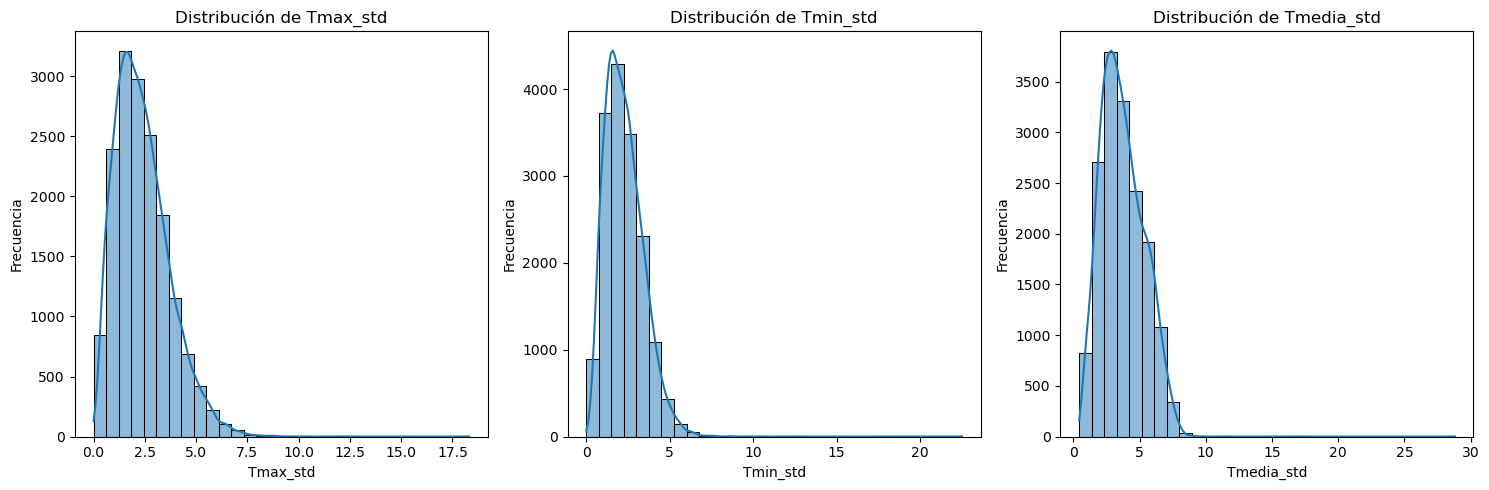

c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


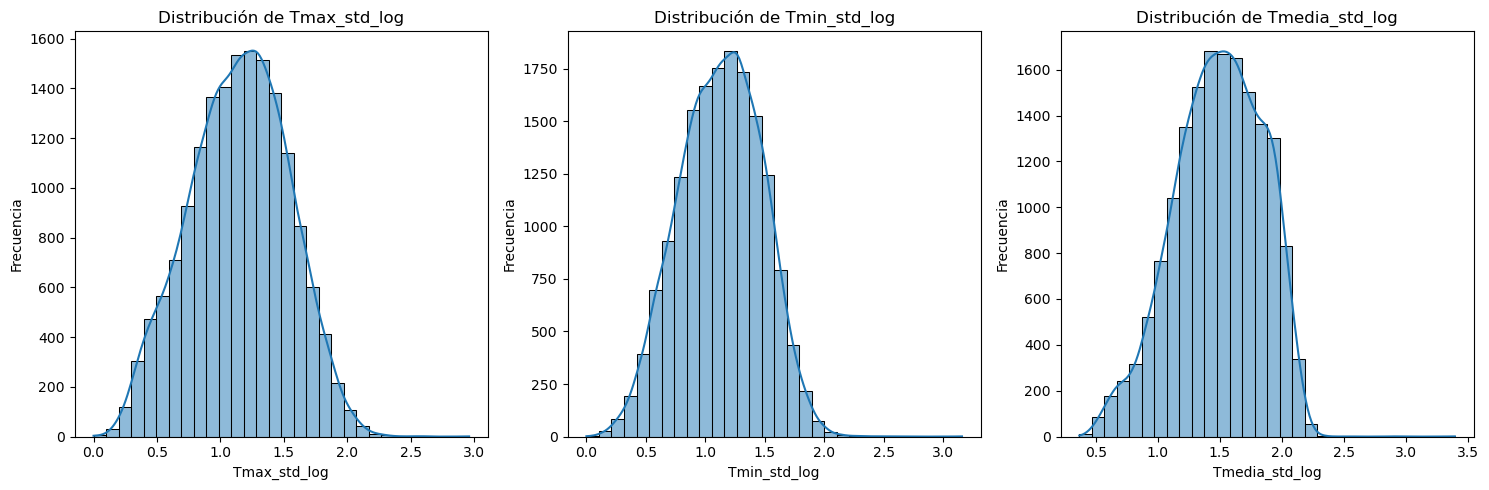

In [32]:
# Configuración del tamaño del gráfico
plt.figure(figsize=(15, 5))

# Crear un histograma para cada columna logarítmica
for i, col in enumerate(col_log, 1):
    plt.subplot(1, 3, i)  # Crear subplots en una fila y tres columnas
    sns.histplot(df_Ts[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

# Ajustar el layout para que no se superpongan los gráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Segundo gráfico transformados
cols_log = ['Tmax_std_log', 'Tmin_std_log','Tmedia_std_log']
# Configuración del tamaño del gráfico
plt.figure(figsize=(15, 5))

# Crear un histograma para cada columna logarítmica
for i, col in enumerate(cols_log, 1):
    plt.subplot(1, 3, i)  # Crear subplots en una fila y tres columnas
    sns.histplot(df_Ts[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

# Ajustar el layout para que no se superpongan los gráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [42]:
# Now drop original _std columns
df_T = df_Ts.drop(columns=col_log)
print(df_T)

# Save df as csv file
df_T.to_csv('dataframe temperaturas', index= False)
print(df_T)


                       nombreEstacion  SemanaEstadistica  Tmedia_mean  \
0                       Balmaceda Ad.                  1    11.860920   
1                       Balmaceda Ad.                  2    16.418182   
2                       Balmaceda Ad.                  3    16.646154   
3                       Balmaceda Ad.                  4    11.916867   
4                       Balmaceda Ad.                  5    11.872727   
...                               ...                ...          ...   
20746  Viña del Mar  Ad. (Torquemada)                 49    16.215470   
20747  Viña del Mar  Ad. (Torquemada)                 50    18.039773   
20748  Viña del Mar  Ad. (Torquemada)                 51    16.974118   
20749  Viña del Mar  Ad. (Torquemada)                 52    16.197093   
20750  Viña del Mar  Ad. (Torquemada)                 53    16.568000   

       Tmedia_median  Tmedia_max  Tmedia_min  Anio  \
0              12.10        16.6         5.5  2014   
1              

<Axes: >

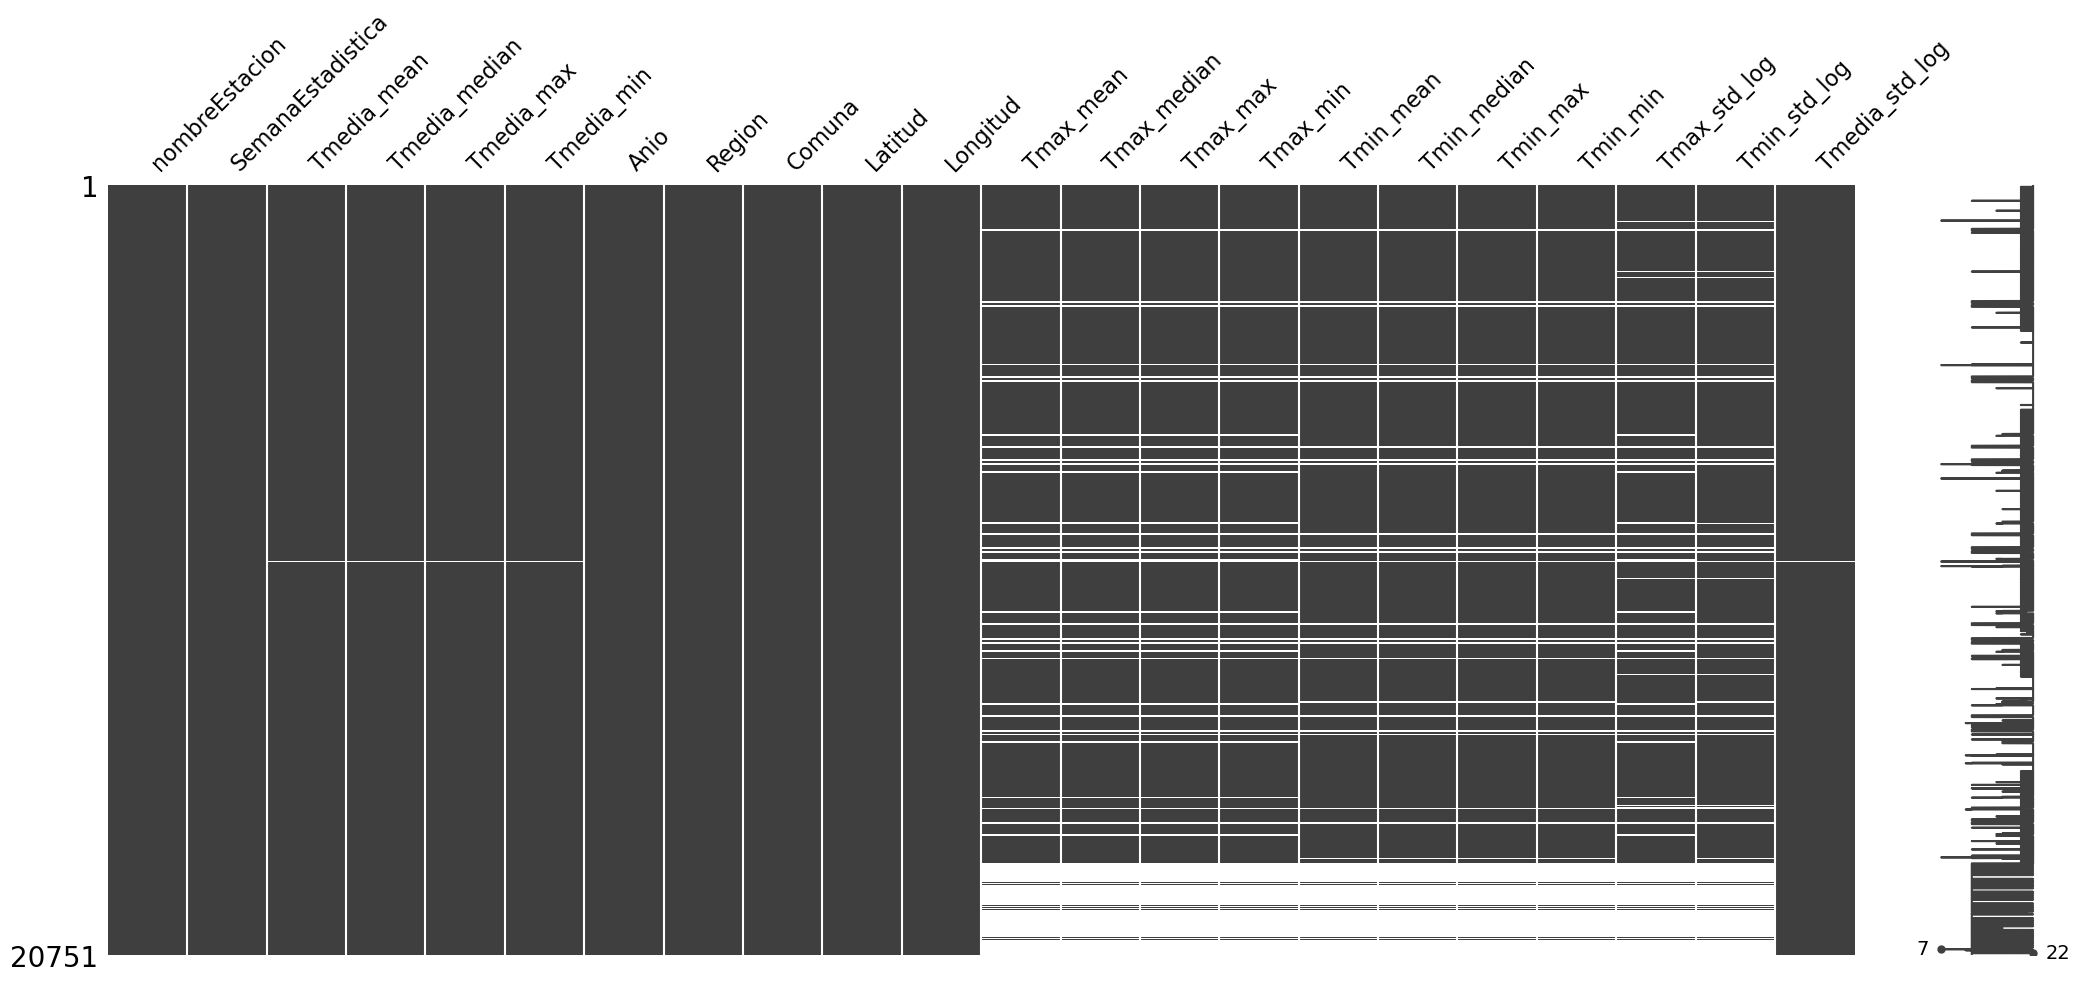

In [49]:
# Visualize missing data with msno
#!pip install missingno
import missingno as msno
# plot
msno.matrix(df_T)

c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


ValueError: could not convert string to float: '--'

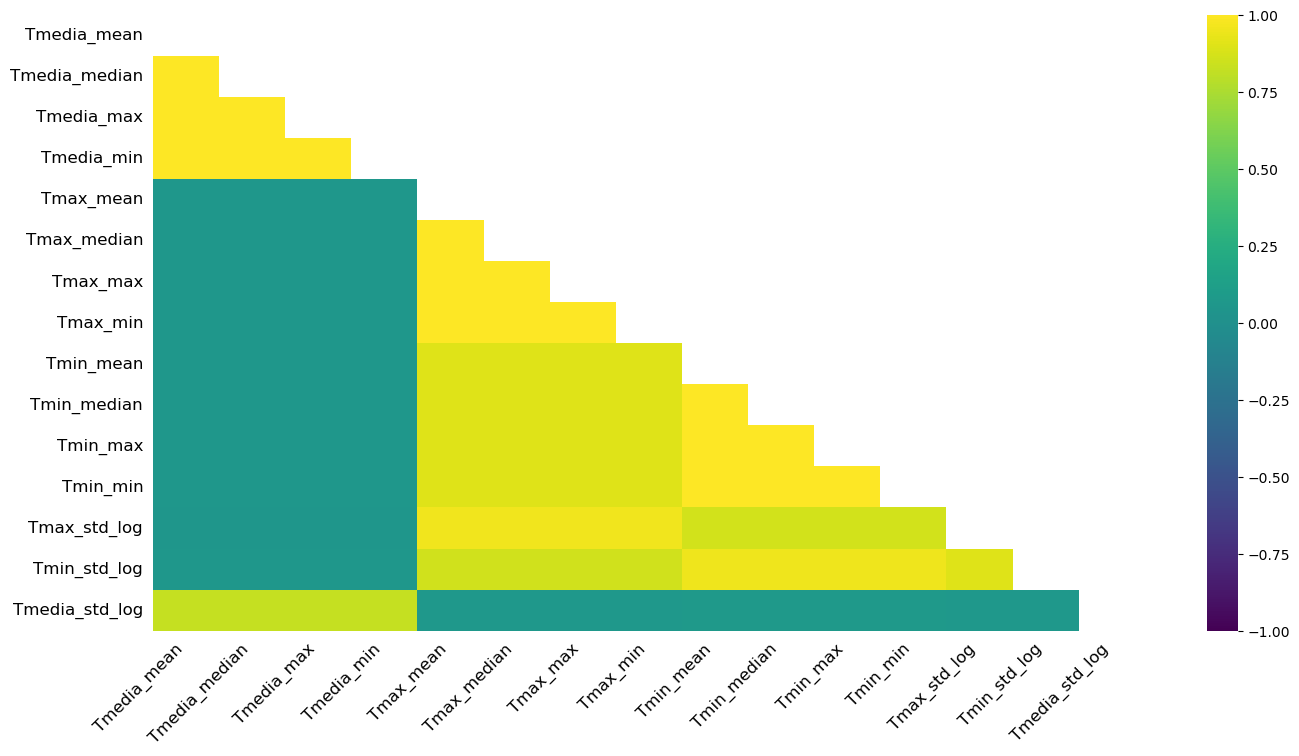

In [48]:
msno.heatmap(df_T, figsize=(16,8), cmap='viridis', fontsize=12)

<Axes: >

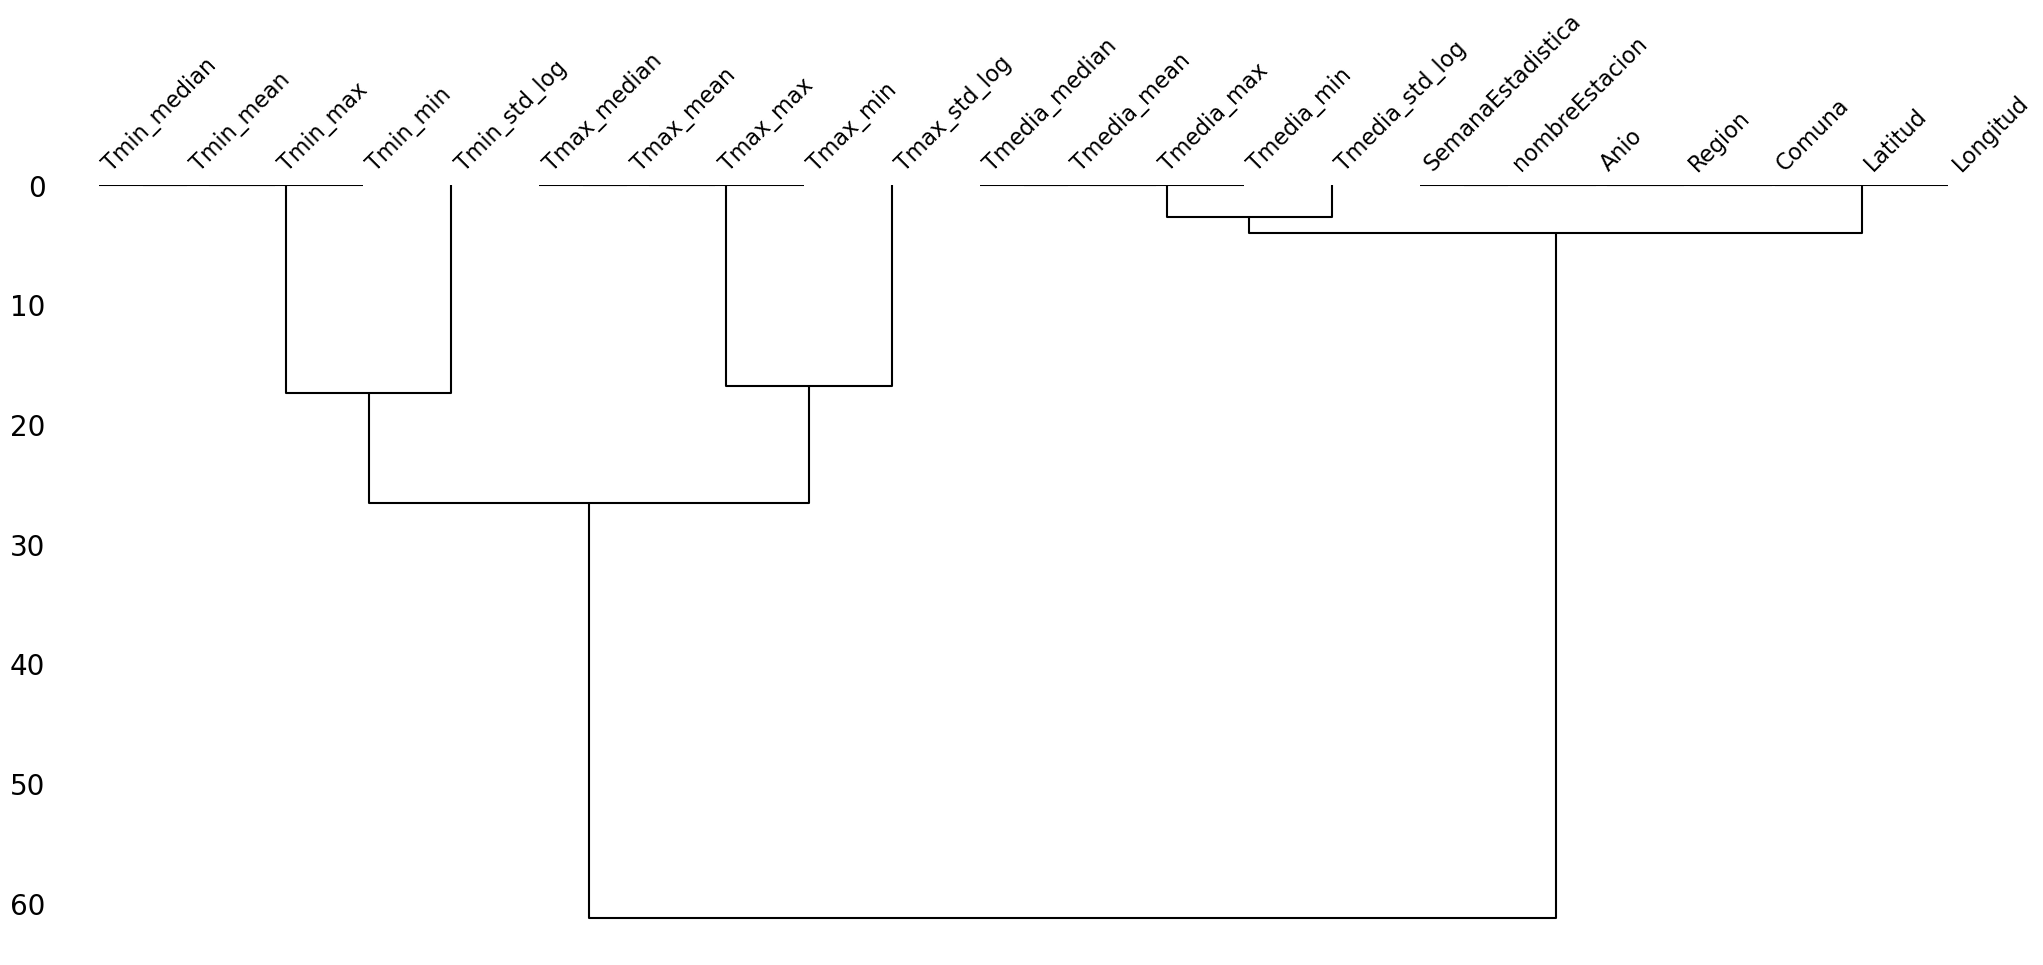

In [50]:
msno.dendrogram(df_T)
print(df_T)

Imputación de datos faltantes con .fillna() con método linear

C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\2042632916.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  linear_imp = df_T.interpolate(method='linear')


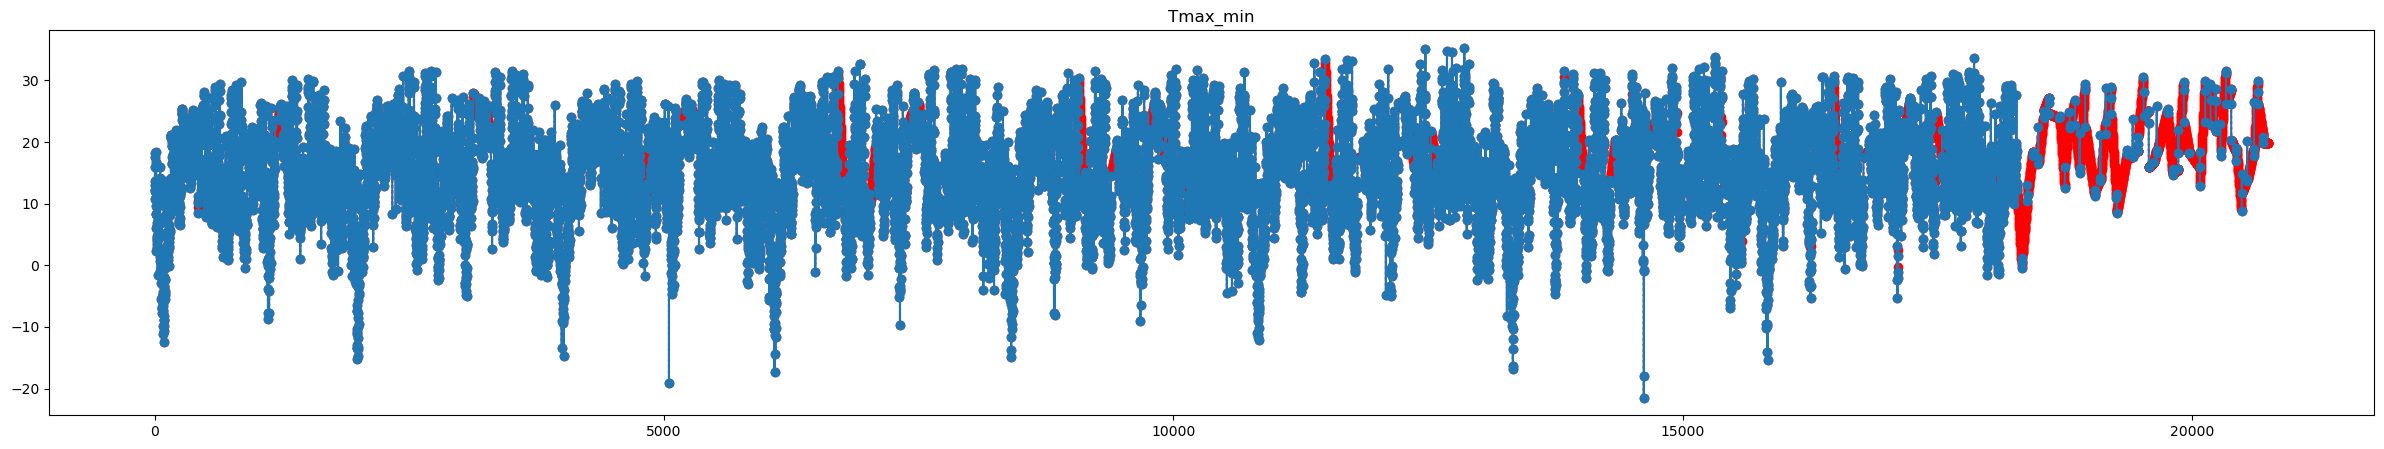

                       nombreEstacion  SemanaEstadistica  Tmedia_mean  \
0                       Balmaceda Ad.                  1    11.860920   
1                       Balmaceda Ad.                  2    16.418182   
2                       Balmaceda Ad.                  3    16.646154   
3                       Balmaceda Ad.                  4    11.916867   
4                       Balmaceda Ad.                  5    11.872727   
...                               ...                ...          ...   
20746  Viña del Mar  Ad. (Torquemada)                 49    16.215470   
20747  Viña del Mar  Ad. (Torquemada)                 50    18.039773   
20748  Viña del Mar  Ad. (Torquemada)                 51    16.974118   
20749  Viña del Mar  Ad. (Torquemada)                 52    16.197093   
20750  Viña del Mar  Ad. (Torquemada)                 53    16.568000   

       Tmedia_median  Tmedia_max  Tmedia_min  Anio  \
0              12.10        16.6         5.5  2014   
1              

C:\Users\Diego\AppData\Local\Temp\ipykernel_2316\2042632916.py:10: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_T_limp = df_T.interpolate(method='linear')


In [55]:
linear_imp = df_T.interpolate(method='linear')

# Plot
linear_imp['Tmax_min'].plot(color='red', marker='o', linestyle='dotted', figsize=(30,5))
df_T['Tmax_min'].plot(title='Tmax_min', marker='o', figsize=(30,5))
plt.show()
print(linear_imp)

# Create definitive df under new name
df_T_limp = df_T.interpolate(method='linear')

# Save df as csv file
df_T_limp.to_csv('dataframe temperaturas interpolado', index= False)


In [61]:
# Truncar df interpolado
df_trunc_Ts = df_T_limp.round(3)
print(df_trunc_Ts)

# Save as csv file
df_trunc_Ts.to_csv('dataframe procesado faltan datos aun.csv', index=False)

                       nombreEstacion  SemanaEstadistica  Tmedia_mean  \
0                       Balmaceda Ad.                  1       11.861   
1                       Balmaceda Ad.                  2       16.418   
2                       Balmaceda Ad.                  3       16.646   
3                       Balmaceda Ad.                  4       11.917   
4                       Balmaceda Ad.                  5       11.873   
...                               ...                ...          ...   
20746  Viña del Mar  Ad. (Torquemada)                 49       16.215   
20747  Viña del Mar  Ad. (Torquemada)                 50       18.040   
20748  Viña del Mar  Ad. (Torquemada)                 51       16.974   
20749  Viña del Mar  Ad. (Torquemada)                 52       16.197   
20750  Viña del Mar  Ad. (Torquemada)                 53       16.568   

       Tmedia_median  Tmedia_max  Tmedia_min  Anio  \
0              12.10        16.6         5.5  2014   
1              

Ahora veré el tema de que faltan datos de la región de ohiggins entre los años 2014 y 2015, lo que haré será duplicar los de la región del ñuble y luego cambiar las variables categóricas para que indiquen que son de la región de ohiggins

In [74]:
# Select dataframe with duplicates to use
df_ohigg_2014 = df_trunc_Ts.loc[747:799]
#print(df_ohigg_2014)
df_ohigg_2015 = df_trunc_Ts.loc[2652:2704]
#print(df_ohigg_2015)

# concatenate this 2 dfs
df_ohigg = pd.concat([df_ohigg_2014,df_ohigg_2015], ignore_index= True)
print(df_ohigg)

# Update dataframe
df_ohigg['nombreEstacion'] = "Rancagua"
df_ohigg['Region'] = "Región Del Libertador Gral. B. O'Higgins"
df_ohigg['Comuna'] = "Rancagua"
df_ohigg['Latitud'] = -34172221
df_ohigg['Longitud'] = -70776110

#print to explore
print(df_ohigg)

# Ok, it's ok, time to concatenate
df_data_T = pd.concat([df_trunc_Ts, df_ohigg], ignore_index= True)
print(df_data_T)

# Save as csv file
df_data_T.to_csv('Data temperaturas.csv', index= False)

                              nombreEstacion  SemanaEstadistica  Tmedia_mean  \
0    General Bernardo O'Higgins, Chillán Ad.                  1       24.173   
1    General Bernardo O'Higgins, Chillán Ad.                  2       26.613   
2    General Bernardo O'Higgins, Chillán Ad.                  3       25.390   
3    General Bernardo O'Higgins, Chillán Ad.                  4       21.616   
4    General Bernardo O'Higgins, Chillán Ad.                  5       22.771   
..                                       ...                ...          ...   
101  General Bernardo O'Higgins, Chillán Ad.                 49       23.493   
102  General Bernardo O'Higgins, Chillán Ad.                 50       21.365   
103  General Bernardo O'Higgins, Chillán Ad.                 51       20.840   
104  General Bernardo O'Higgins, Chillán Ad.                 52       25.997   
105  General Bernardo O'Higgins, Chillán Ad.                 53       27.138   

     Tmedia_median  Tmedia_max  Tmedia_

# Todo lo debajo de esto son pruebas

La celda abajo de esto fue la que se usó para crear la función de Tmax

In [ ]:
# Esto funciona y lo vamos a escalar a todos los años y a través de las 3 variables, eso significa que para semana estadistica tendría 15 condiciones, 5 de cada tipo de temperatura
def weeknum_starting_jan1(date):
    start_of_year = pd.Timestamp(year=date.year, month=1, day=1)
    days_since_start = (date - start_of_year).days
    week_number = days_since_start // 7 + 1
    return week_number
# 2014
df_Tmed_2014 = pd.read_csv(r'Datos-CambioClimatico github\T máxima\2014_tmaxima_dmc.csv')
df_Tmed_2014['time'] = pd.to_datetime(df_Tmed_2014['time'])
# Filter rows where year is 2014, to drop rows 2015
df_Tmed_2014 = df_Tmed_2014[df_Tmed_2014['time'].dt.year == 2014]
# Add SemanaEstadistica 
df_Tmed_2014['SemanaEstadistica'] = df_Tmed_2014['time'].apply(weeknum_starting_jan1)
# Add column "Anio" to fit with epidemiologic data df
df_Tmed_2014['Anio'] = df_Tmed_2014['time'].dt.year
# get only date 
df_Tmed_2014['time'] = df_Tmed_2014['time'].dt.date

# Calculate weekly stats
weekly_stats_Tmax_2014 = df_Tmed_2014.groupby(['nombreEstacion','SemanaEstadistica']).agg(
    Tmax_mean=('TxPM','mean'),
    Tmax_median=('TxPM','median'),
    Tmax_max=('TxPM','max'),
    Tmax_min=('TxPM','min'),
    Tmax_std=('TxPM','std')
)
#print(weekly_stats_Tmax_2014)
# reset index on weekly stats
weekly_stats_Tmax_2014.reset_index(inplace=True)
# Join stats with df, leftjoin
df_Tmed_2014 = pd.merge(df_Tmed_2014, weekly_stats_Tmax_2014, on=['nombreEstacion','SemanaEstadistica'], how='left')
print(df_Tmed_2014)

In [ ]:
#este funcionaba bien pero no lo hacia para cada estacion 
def weeknum_starting_jan1(date):
    start_of_year = pd.Timestamp(year=date.year, month=1, day=1)
    days_since_start = (date - start_of_year).days
    week_number = days_since_start // 7 + 1
    return week_number
# 2014
df_Tmed_2014 = pd.read_csv(r'Datos-CambioClimatico github\T máxima\2014_tmaxima_dmc.csv')
df_Tmed_2014['time'] = pd.to_datetime(df_Tmed_2014['time'])
# Filter rows where year is 2014, to drop rows 2015
df_Tmed_2014 = df_Tmed_2014[df_Tmed_2014['time'].dt.year == 2014]
# Add SemanaEstadistica 
df_Tmed_2014['SemanaEstadistica'] = df_Tmed_2014['time'].apply(weeknum_starting_jan1)
# Add column "Anio" to fit with epidemiologic data df
df_Tmed_2014['Anio'] = df_Tmed_2014['time'].dt.year
# get only date 
df_Tmed_2014['time'] = df_Tmed_2014['time'].dt.date

# Calculate weekly stats
weekly_stats_Tmax = df_Tmed_2014.groupby(['nombreEstacion','SemanaEstadistica']).agg(
    Tmax_mean=('TxPM','mean'),
    Tmax_median=('TxPM','median'),
    Tmax_max=('TxPM','max'),
    Tmax_min=('TxPM','min'),
    Tmax_std=('TxPM','std')
)
print(weekly_stats_Tmax)

In [9]:
# Probar función para explorar que funciona bien en el año,
# ya funciona bien en: 2014, 2015
def weeknum_starting_jan1(date):
    start_of_year = pd.Timestamp(year=date.year, month=1, day=1)
    days_since_start = (date - start_of_year).days
    week_number = days_since_start // 7 + 1
    return week_number
# filas a agregar
# Add SemanaEstadistica 
#df_Tmed_2015['SemanaEstadistica'] = df_Tmed_2015['time'].apply(weeknum_starting_jan1)

# 2016
df_Tmed_2016 = pd.read_csv(r'Datos-CambioClimatico github\T máxima\2016_tmaxima_dmc.csv')
df_Tmed_2016['time'] = pd.to_datetime(df_Tmed_2016['time'])
# Add SemanaEstadistica 
df_Tmed_2016['SemanaEstadistica'] = df_Tmed_2016['time'].apply(weeknum_starting_jan1)
# get only date 
df_Tmed_2016['time'] = df_Tmed_2016['time'].dt.date
print(df_Tmed_2016)

             time   latitud  longitud  TxPM  CodigoNacional  \
0      2016-01-02 -18.35555 -70.34028  24.4        180005.0   
1      2016-01-03 -18.35555 -70.34028  25.1        180005.0   
2      2016-01-04 -18.35555 -70.34028  24.8        180005.0   
3      2016-01-05 -18.35555 -70.34028  25.0        180005.0   
4      2016-01-06 -18.35555 -70.34028  25.6        180005.0   
...           ...       ...       ...   ...             ...   
13500  2016-12-28 -62.19194 -58.97972   1.1        950001.0   
13501  2016-12-29 -62.19194 -58.97972   1.0        950001.0   
13502  2016-12-30 -62.19194 -58.97972   2.1        950001.0   
13503  2016-12-31 -62.19194 -58.97972   0.5        950001.0   
13504  2017-01-01 -62.19194 -58.97972   2.6        950001.0   

                                 nombreEstacion  SemanaEstadistica  
0                         Chacalluta, Arica Ap.                  1  
1                         Chacalluta, Arica Ap.                  1  
2                         Chacalluta

In [4]:
# Generate dataframes for T máxima

# Function to assign SemanaEstadistica
def weeknum_starting_jan1(date):
    start_of_year = pd.Timestamp(year=date.year, month=1, day=1)
    days_since_start = (date - start_of_year).days
    week_number = days_since_start // 7 + 1
    return week_number

# 2014
df_Tmed_2014 = pd.read_csv(r'Datos-CambioClimatico github\T máxima\2014_tmaxima_dmc.csv')
df_Tmed_2014['time'] = pd.to_datetime(df_Tmed_2014['time'])
# Add SemanaEstadistica 
df_Tmed_2014['SemanaEstadistica'] = df_Tmed_2014['time'].apply(weeknum_starting_jan1)
# get only date 
df_Tmed_2014['time'] = df_Tmed_2014['time'].dt.date
print(df_Tmed_2014)

# 2015
df_Tmed_2015 = pd.read_csv(r'Datos-CambioClimatico github\T máxima\2015_tmaxima_dmc.csv')
df_Tmed_2015['time'] = pd.to_datetime(df_Tmed_2015['time'])
# get only date 
df_Tmed_2015['time'] = df_Tmed_2015['time'].dt.date
print(df_Tmed_2015)

# 2016
df_Tmed_2016 = pd.read_csv(r'Datos-CambioClimatico github\T máxima\2016_tmaxima_dmc.csv')
df_Tmed_2016['time'] = pd.to_datetime(df_Tmed_2016['time'])
# get only date 
df_Tmed_2016['time'] = df_Tmed_2016['time'].dt.date
print(df_Tmed_2016)

# 2017
df_Tmed_2017 = pd.read_csv(r'Datos-CambioClimatico github\T máxima\2017_tmaxima_dmc.csv')
df_Tmed_2017['time'] = pd.to_datetime(df_Tmed_2017['time'])
# get only date 
df_Tmed_2017['time'] = df_Tmed_2017['time'].dt.date
print(df_Tmed_2017)

# 2018
df_Tmed_2018 = pd.read_csv(r'Datos-CambioClimatico github\T máxima\2018_tmaxima_dmc.csv')
df_Tmed_2018['time'] = pd.to_datetime(df_Tmed_2018['time'])
# get only date 
df_Tmed_2018['time'] = df_Tmed_2018['time'].dt.date
print(df_Tmed_2018)

# 2019
df_Tmed_2019 = pd.read_csv(r'Datos-CambioClimatico github\T máxima\2019_tmaxima_dmc.csv')
df_Tmed_2019['time'] = pd.to_datetime(df_Tmed_2019['time'])
# get only date 
df_Tmed_2019['time'] = df_Tmed_2019['time'].dt.date
print(df_Tmed_2019)

# 2020
df_Tmed_2020 = pd.read_csv(r'Datos-CambioClimatico github\T máxima\2020_tmaxima_dmc.csv')
df_Tmed_2020['time'] = pd.to_datetime(df_Tmed_2020['time'])
# get only date 
df_Tmed_2020['time'] = df_Tmed_2020['time'].dt.date
print(df_Tmed_2020)

# 2021
df_Tmed_2021 = pd.read_csv(r'Datos-CambioClimatico github\T máxima\2021_tmaxima_dmc.csv')
df_Tmed_2021['time'] = pd.to_datetime(df_Tmed_2021['time'])
# get only date 
df_Tmed_2021['time'] = df_Tmed_2021['time'].dt.date
print(df_Tmed_2021)

# 2022
df_Tmed_2022 = pd.read_csv(r'Datos-CambioClimatico github\T máxima\2022_tmaxima_dmc.csv')
df_Tmed_2022['time'] = pd.to_datetime(df_Tmed_2022['time'])
# get only date 
df_Tmed_2022['time'] = df_Tmed_2022['time'].dt.date
print(df_Tmed_2022)


             time   latitud  longitud  TxPM  CodigoNacional  \
0      2014-01-02 -18.35555 -70.34028  25.8        180005.0   
1      2014-01-03 -18.35555 -70.34028  25.6        180005.0   
2      2014-01-04 -18.35555 -70.34028  25.1        180005.0   
3      2014-01-05 -18.35555 -70.34028  25.6        180005.0   
4      2014-01-06 -18.35555 -70.34028  26.1        180005.0   
...           ...       ...       ...   ...             ...   
12552  2014-12-28 -62.19194 -58.97972  -0.2        950001.0   
12553  2014-12-29 -62.19194 -58.97972   0.7        950001.0   
12554  2014-12-30 -62.19194 -58.97972   1.2        950001.0   
12555  2014-12-31 -62.19194 -58.97972   1.1        950001.0   
12556  2015-01-01 -62.19194 -58.97972   0.7        950001.0   

                                 nombreEstacion  SemanaEstadistica  
0                         Chacalluta, Arica Ap.                  1  
1                         Chacalluta, Arica Ap.                  1  
2                         Chacalluta